# TF binding GO (1kb)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# box plot of Giggle scores 

upload Universal.CHM.30CpG1kb.bed to Cistrome toolkit  
select total peaks

In [2]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding')
cobinding_TF_df_dict = {}
cobinding_TF_ls_dict = {}
# for process in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal'] :
for process in ['Universal'] :
    gene_df = pd.read_csv(f'total/cistrome_toolkit_results_1kb/{process}.ComplementCHM.30CpG1kb.bed_result.csv')
    cobinding_TF_df = gene_df
    cobinding_TF_ls = gene_df['Factor'].tolist()
    cobinding_TF_df_dict[process] = cobinding_TF_df
    cobinding_TF_ls_dict[process] = cobinding_TF_ls

cobinding_TF_df_dict

{'Universal':          GSM_ID   Factor                   Biosource  GIGGLE_score
 0    GSM1981207     PAX6              alpha-TN4;lens   3501.881769
 1     GSM700553    SUZ12  Embryonic Stem Cell;Embryo   3288.274942
 2    GSM1889271   MSIN3A         T Lymphocyte;Spleen   3142.829523
 3    GSM2481146   POLR2A                Do-11-10;Th1   3040.030090
 4    GSM1782932  SMAD2/3         Embryonic Stem Cell   2964.277242
 ..          ...      ...                         ...           ...
 195  GSM1891649     NRF1      Neural Progenitor Cell   2006.547519
 196  GSM2096641   STAT5A          Ba/F3;B Lymphocyte   2006.467332
 197  GSM1479711   POLR2A                       Liver   1999.903137
 198  GSM2948956     BRD4       Amac_I_N-rG79.04;iPSC   1998.728115
 199  GSM1479715   POLR2A                       Liver   1998.165777
 
 [200 rows x 4 columns]}

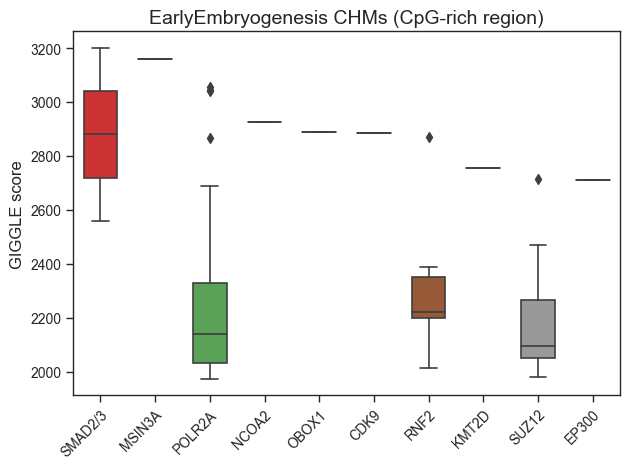

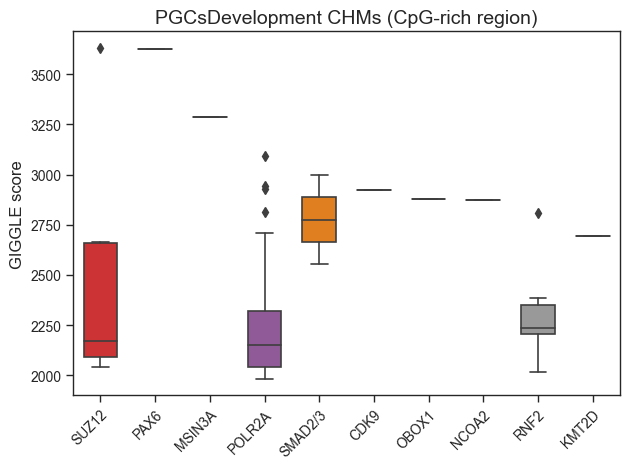

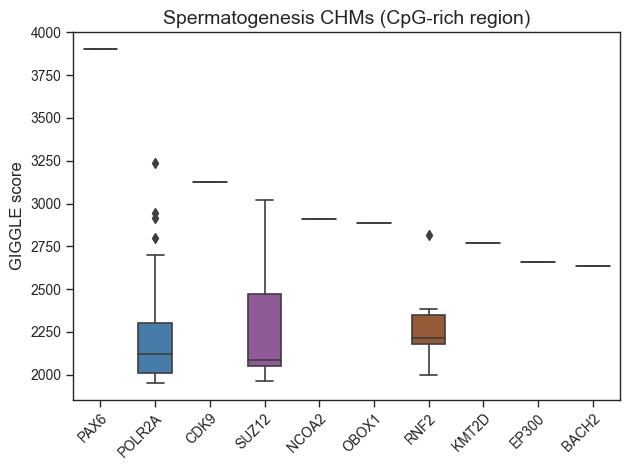

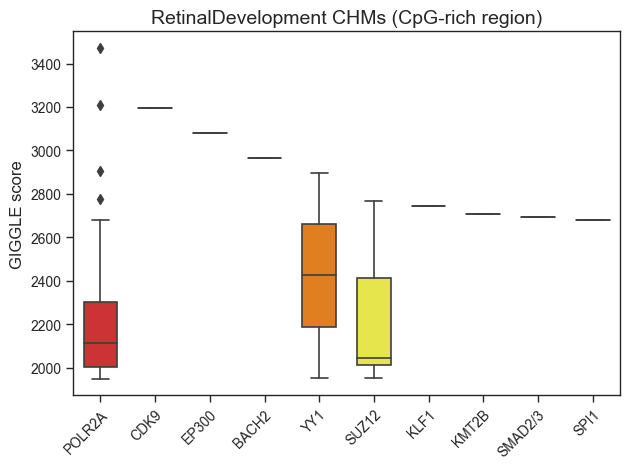

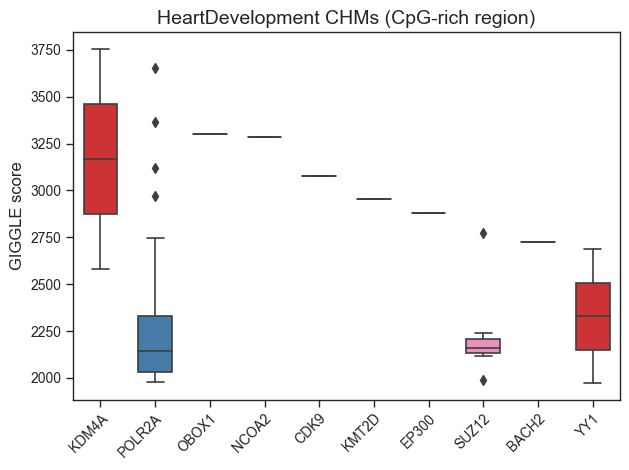

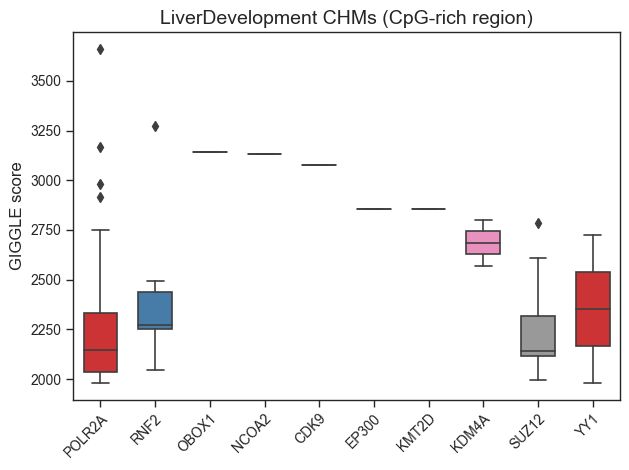

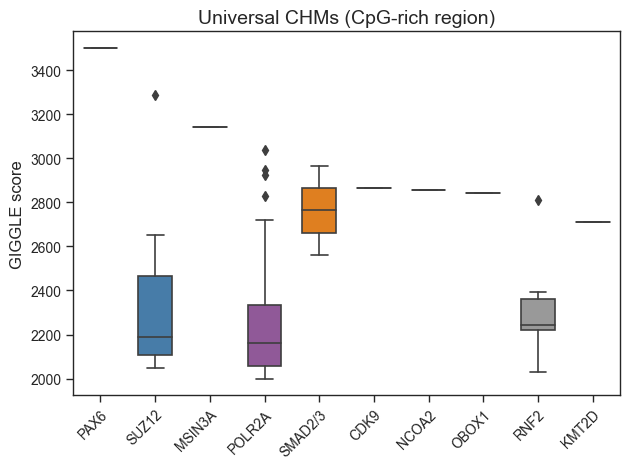

In [4]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal'] :
        cobinding_TF_df = cobinding_TF_df_dict[process]
        fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout = True)
        plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).max().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
        sns.boxplot(
            data = plot_df,
            x = 'Factor',
            y = 'GIGGLE_score',
            ax = ax,
            width = .618,
            palette = 'Set1'
        )
        ax.set_title(f'{process} CHMs (CpG-rich region)')
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
        ax.set_xlabel('')
        ax.set_ylabel('GIGGLE score')

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_box_TF_binding_cistrome_ggScore_{process}ComplementCHM_top10TF_30CpG1kb.pdf', transparent = True)    
                

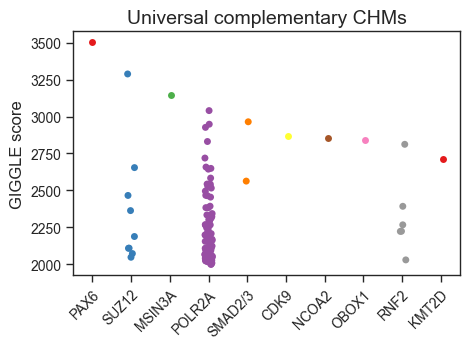

In [3]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    # for process in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal'] :
    for process in ['Universal'] :
        cobinding_TF_df = cobinding_TF_df_dict[process]
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8 * .75), tight_layout = True)
        plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).max().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
        sns.stripplot(
            data = plot_df,
            x = 'Factor',
            y = 'GIGGLE_score',
            ax = ax,
            # width = .618,
            palette = 'Set1'
        )
        ax.set_title(f'{process} complementary CHMs')
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
        ax.set_xlabel('')
        ax.set_ylabel('GIGGLE score')

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_strip_TF_binding_cistrome_ggScore_{process}ComplementCHM_top10TF_30CpG1kb.pdf', transparent = True)    
                

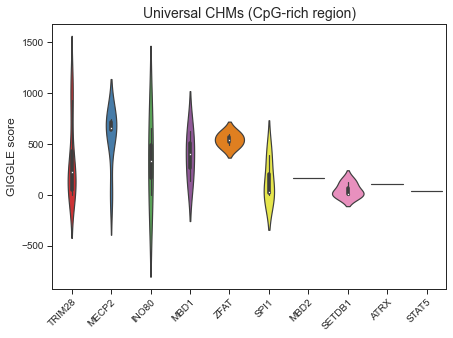

In [5]:
### not used
# with sns.axes_style('white', rc={
#         'xtick.bottom': True,
#         'ytick.left': True
# }), sns.plotting_context('paper',
#                          rc={
#                              'axes.titlesize': 14,
#                              'axes.labelsize': 12,
#                              'xtick.labelsize': 10,
#                              'ytick.labelsize': 10,
#                              'legend.fontsize': 10
#                          }):
#     fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout = True)
#     plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).mean().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
#     sns.violinplot(
#         data = plot_df,
#         x = 'Factor',
#         y = 'GIGGLE_score',
#         ax = ax,
# #         width = .618,
#         palette = 'Set1'
#     )
#     ax.set_title(f'Universal CHMs (CpG-rich region)')
#     ax.set_xticks(range(len(ax.get_xticklabels())))
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
#     ax.set_xlabel('')
#     ax.set_ylabel('GIGGLE score')

#     fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_box_TF_binding_cistrome_ggScore_universalCHM_top10TF_30CpG1kb.pdf', transparent = True)    
            

In [4]:
### with giggle = 0 (not used)
for process in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal'] :
    cobinding_TF_df = cobinding_TF_df_dict[process]
    pd.DataFrame([x[0]+x[1:].lower() for x in cobinding_TF_df['Factor'].unique()]).to_csv(
        f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb/{process}.ComplementCHM.30CpG1kb.TF.txt',
        sep = "\t", header = False, index = False
                                            )

In [7]:
### without giggle = 0 (for supplementary table)
for process in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal'] :
    cobinding_TF_df = cobinding_TF_df_dict[process]
    pd.DataFrame([x[0]+x[1:].lower() for x in cobinding_TF_df.loc[cobinding_TF_df['GIGGLE_score']>0]['Factor'].unique()]).to_csv(
        f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb/{process}.ComplementCHM.30CpG1kb.TF_giggleOver0.txt',
        sep = "\t", header = False, index = False
                                            )

# GO

In [2]:
# Python functions to read .CSV files into a Pandas DataFrame when the data of interest is before / after one or more empty/blank lines.
import csv
def csv_after_emptylines(filepath, dtype=str):
    """ Read a .CSV into a Pandas DataFrame, but only after at least one blank line has been skipped.
    bl_group_n is the expected number of distinct blocks of blank lines (of any number of rows each) to skip before reading data.
    NB: E.g. pd.read_csv(filepath, skiprows=[0, 1, 2]) works if you know the number of rows to be skipped. Use this function if you have a variable / unknown number of filled rows (to be skipped / ignored) before the empty rows.
    """
    with open(filepath, newline='') as f:
        contents = []
        headers = None
        r = csv.reader(f, delimiter='\t')
        return_df = pd.DataFrame()
        cluster_flag = True
        header_flag = False
        for i, l in enumerate(r):
            if not l:
                df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
                df['cluster'] = name[0].split(" ")[-1]
                df['enrichment_score'] = float(name[1].split(" ")[-1])
                return_df = pd.concat([return_df, df])
                contents = []
                cluster_flag = True
            else :
                if cluster_flag :
                    name = l
                    cluster_flag = False
                    header_flag = True
                elif header_flag :
                    headers = l
                    header_flag = False
                else :    
                    contents.append(l)
                
        df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
        df['cluster'] = name[0].split(" ")[-1]
        df['enrichment_score'] = float(name[1].split(" ")[-1])
        return_df = pd.concat([return_df, df])        
        
        return return_df


def csv_until_emptyline(filepath, dtype=str):
    """ Read a .CSV into a Pandas DataFrame until a blank line is found, then stop.
    """
    with open(filepath, newline='') as f:
        contents = []
        r = csv.reader(f, delimiter='\t')
        name = next(r, None)
        for i, l in enumerate(r):
            if not l:
                break
            if i == 0:
                headers = l
                continue
            contents.append(l)
        df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
        df['cluster'] = name[0].split(' ')[-1]
        df['enrichment_score'] = float(name[1].split(' ')[-1])
        return df

In [10]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb')
david_go_df_dict = {}
for go_bp_type in ['ALL', 'DIRECT'] :
    david_go_df_dict[go_bp_type] = {}
    for t in ['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal'] :
        df = csv_after_emptylines(f'{t}.ComplementCHM.30CpG1kb.GO_BP_{go_bp_type}.txt')
        df['GO Term'] = df['Term'].str.split('~', expand = True)[1]
        df['-log10(p-value)'] = -np.log10(df['PValue'].astype('float'))
        david_go_df_dict[go_bp_type][t.split('.')[0]] = df.loc[df['PValue'].astype('float') <= 0.05]

In [12]:
color_dict = {
    'EarlyEmbryogenesis': '#9B1C3D', 
    'PGCsDevelopment' : '#16557A', 
    'Spermatogenesis' : '#1B9E77', 
    'RetinalDevelopment' : '#BF8B12', 
    'HeartDevelopment' : '#2E8BC0', 
    'LiverDevelopment' : '#666666',
    'Universal' : '#DA404E',
}

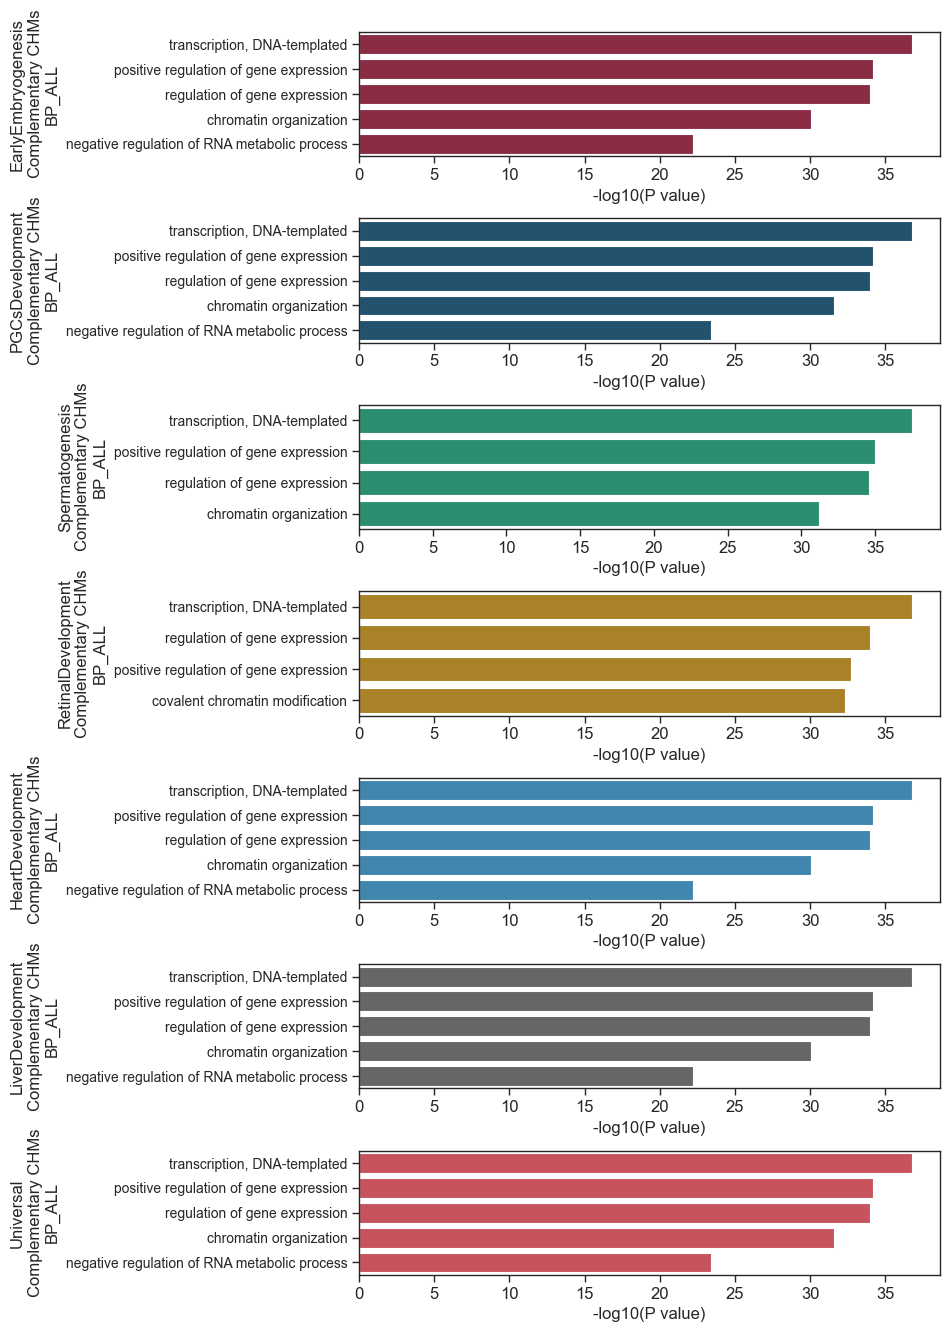

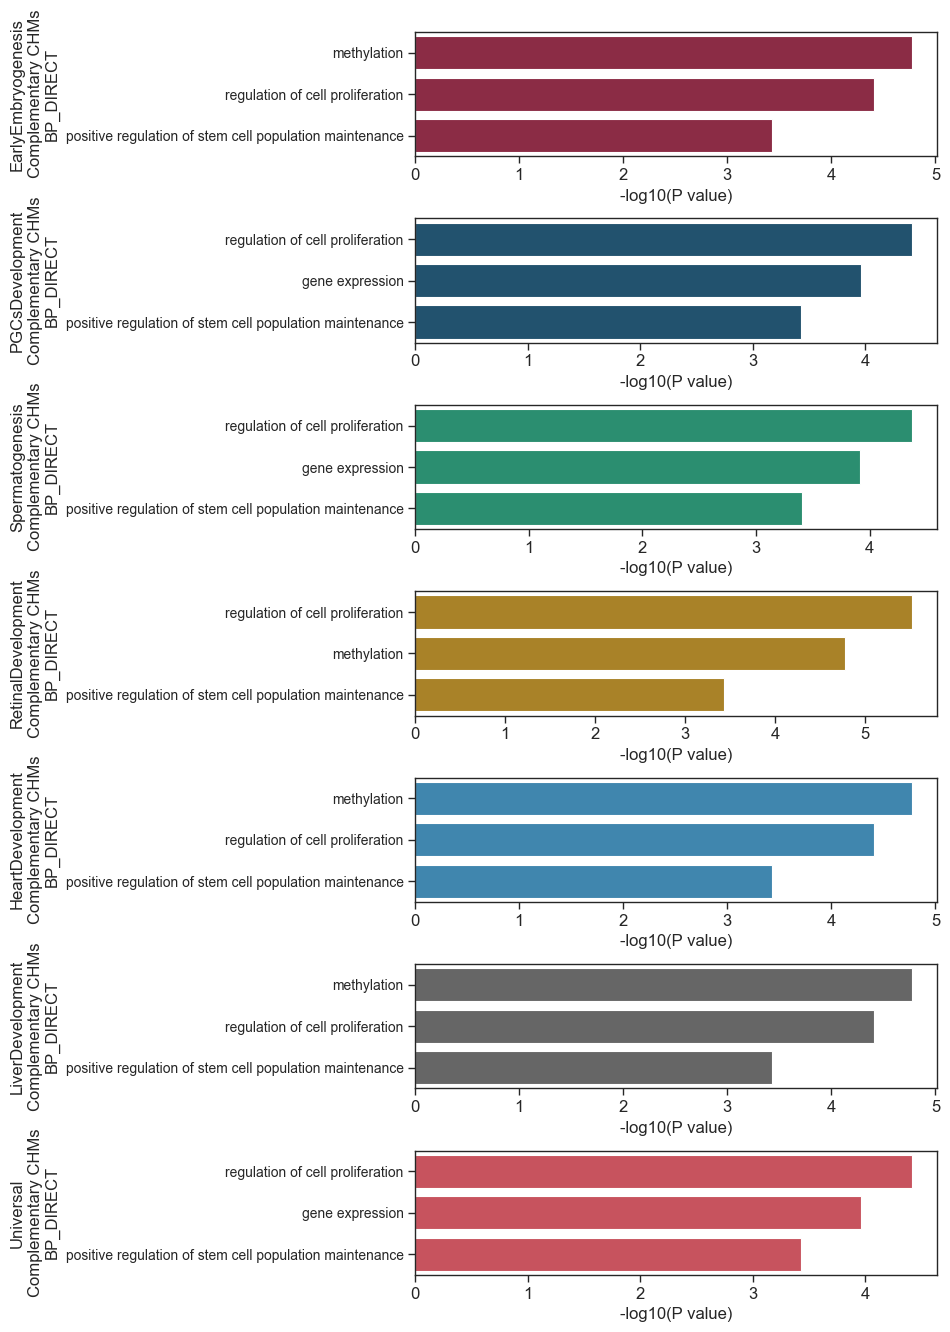

In [16]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 12,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for go_bp_type in ['ALL', 'DIRECT'] :
        fig, axes = plt.subplots(7,1,figsize = (6.4 * 1.5, 4.8 * 2.75), tight_layout= True, sharex = False)
        for i,t in enumerate(['EarlyEmbryogenesis', 'PGCsDevelopment', 'Spermatogenesis', 'RetinalDevelopment', 'HeartDevelopment', 'LiverDevelopment', 'Universal']) :
            ax = axes[i]
            df = david_go_df_dict[go_bp_type][t].sort_values(['-log10(p-value)'], ascending = False).groupby(['cluster']).head(1)
            if df.empty :
                break
            sns.barplot(
                data = df.head(5),
                y = 'GO Term',
                x = '-log10(p-value)',
                ax = ax,
                color = color_dict[t]
            )
            ax.set_xlabel('-log10(P value)')
            ax.set_ylabel(f'{t}\nComplementary CHMs\nBP_{go_bp_type}')
    
        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_bar_GO_universalProcessComplement_TF_1kbBin_giggleOver0_GOBP{go_bp_type}.pdf', transparent = True)    